## CV_Assignment_10
1. Why don't we start all of the weights with zeros?
2. Why is it beneficial to start weights with a mean zero distribution?
3. What is dilated convolution, and how does it work?
4. What is TRANSPOSED CONVOLUTION, and how does it work?
5. Explain Separable convolution
6. What is depthwise convolution, and how does it work?
7. What is Depthwise separable convolution, and how does it work?
8. Capsule networks are what they sound like.
9. Why is POOLING such an important operation in CNNs?
10. What are receptive fields and how do they work?

In [1]:
'''Ans 1:- Starting all weights with zeros in a neural network is not
ideal because it leads to symmetrical weight updates during
training. This symmetry prevents the network from learning
effectively, as all neurons in a layer would behave the same way.
Random initialization breaks this symmetry, allowing neurons to
learn unique features and patterns, improving the network's
ability to generalize to diverse data.

Here we create a simple neural network with one hidden
layer. We use RandomNormal from TensorFlow's initializers to
initialize the weights of both layers with random values sampled from
a normal distribution. When we run this code, we see that
the initial weights of the layers are random, which is crucial
for training the network effectively.'''

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
import numpy as np

# Create a simple neural network with one hidden layer
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(10,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)),
    Dense(1, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.01))
])

# Generate random input data for demonstration
input_data = np.random.random((100, 10))

# Perform a forward pass to demonstrate random weight initialization
output = model(input_data)

# Check the initial weights of the first layer
print("Initial weights of the first layer:")
print(model.layers[0].get_weights()[0])

# Check the initial weights of the second layer
print("\nInitial weights of the second layer:")
print(model.layers[1].get_weights()[0])

Initial weights of the first layer:
[[ 1.73048570e-03  2.15792395e-02 -5.45385526e-04  6.08177332e-04
  -5.68147632e-04  1.51719963e-02 -2.90611293e-03 -1.40976207e-02
  -1.96108734e-03 -1.70416737e-04  1.27473543e-03 -9.79721313e-04
  -4.41015745e-03  3.66641150e-04  6.28681760e-03  2.69874744e-03
   4.58311988e-03 -5.73493820e-03 -3.72101436e-03  1.72235835e-02
   6.58209249e-03 -3.56225716e-03  5.64855384e-03 -1.55215496e-02
  -2.44183876e-02  1.24262096e-02  1.32740149e-02 -2.41706986e-03
  -6.56215288e-03 -2.57476536e-03  1.11854803e-02  4.42352472e-03
  -1.63535383e-02  1.03521172e-03  1.22039886e-02  9.93208122e-03
   1.48785615e-03  2.09671631e-02  1.12326713e-02  1.81669276e-02
   6.58750115e-03 -3.88711412e-03 -3.50730435e-04  2.76906718e-03
  -1.62598281e-03  7.39945984e-03 -8.49379506e-03  3.26538784e-03
  -9.74779390e-03 -1.51152331e-02  7.24056875e-03 -1.80447027e-02
  -7.04925600e-03  3.38372379e-03 -5.91138424e-03 -5.44327917e-03
   9.65792593e-03 -4.43000207e-03  7.805

In [2]:
'''Ans 2:- Initializing weights with a mean zero distribution, such
as a normal distribution with mean zero, benefits neural
networks by promoting symmetry breaking and enabling efficient
learning. When weights start with a mean of zero, neurons in the
network initially produce similar activations, but their
differences emerge during training due to random perturbations. This
asymmetry allows neurons to learn unique features and gradients to
flow effectively during backpropagation. Consequently, networks
converge faster, avoid getting stuck in local minima, and can
better capture complex patterns in data, leading to improved
model performance.

we use RandomNormal from TensorFlow's initializers to
initialize the weights of the first layer with a mean-zero normal
distribution. When we run this code, we will see that the initial
weights of the layer have a mean close to zero, which helps in
breaking symmetry and promoting effective learning during training.'''

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
import numpy as np

# Create a simple neural network with one hidden layer
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(10,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.01))
])

# Generate random input data for demonstration
input_data = np.random.random((100, 10))

# Perform a forward pass to demonstrate weight initialization
output = model(input_data)

# Check the initial weights of the first layer
print("Initial weights of the first layer:")
print(model.layers[0].get_weights()[0])

Initial weights of the first layer:
[[ 1.41585935e-02 -8.35962128e-03 -5.92908496e-03 -1.23531539e-02
   8.48786067e-03  8.10726173e-03 -3.06569482e-03 -7.67007004e-04
   2.80040025e-04  2.60532222e-04 -1.15044983e-02 -8.73558875e-03
  -1.91941019e-03 -1.19930161e-02  9.69432294e-04 -2.50675548e-02
  -2.47446308e-03 -9.67464130e-03 -1.51129970e-02  2.39513488e-03
  -6.48677908e-03  9.34625932e-05  6.64855028e-03  1.60482656e-02
  -7.31666456e-04 -9.26106120e-04  7.40381097e-03 -8.21359176e-03
  -8.53231084e-03 -1.71216857e-03  1.61846783e-02  3.71245318e-03
  -3.87076032e-03  5.64790424e-03 -1.80399069e-03  1.15546463e-02
  -1.86573365e-03 -9.85901803e-04 -1.82219185e-02  7.33517529e-03
   9.14500654e-03 -1.40310032e-02  1.93259248e-03  1.53387124e-02
  -4.44826018e-03  4.59313486e-03 -5.69084380e-03 -6.43084524e-03
   1.03592151e-03 -1.32705998e-02 -1.42150782e-02  1.56962220e-02
   4.09498345e-03 -1.27098151e-02  1.02850599e-02 -2.96466472e-03
  -5.58797223e-03  9.78830387e-04  3.121

In [3]:
'''Ans 3:- Dilated convolution, also known as atrous convolution, is
a convolutional operation used in deep learning for image
processing and computer vision. It involves introducing gaps
(dilation) between kernel elements. This increases the receptive
field of each neuron without increasing the number of
parameters, allowing neural networks to capture both local and global
information in the input data efficiently. It's often used in
applications like semantic segmentation and image generation.

In this example, we create a simple CNN with a dilated
convolution layer using Conv2D from TensorFlow's Keras API. The
dilation_rate parameter is set to 2, indicating a dilated convolution
operation with a dilation factor of 2. This means the kernel
elements are spaced apart by a distance of 2 pixels, allowing the
network to capture a broader range of information from the input
data.'''

import tensorflow as tf

# Create a simple CNN with a dilated convolution layer
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, dilation_rate=2, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model (add loss function, optimizer, etc.)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate random input data (e.g., 28x28 grayscale images) for demonstration
input_data = tf.random.normal((32, 28, 28, 1))

# Perform a forward pass through the network
output = model(input_data)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        640       
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                368650    
                                                                 
Total params: 369290 (1.41 MB)
Trainable params: 369290 (1.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
'''Ans 4:- Transposed convolution, also known as deconvolution or
up-sampling, is a technique in deep learning used for increasing the
spatial resolution of feature maps. It involves creating an output
tensor larger than the input by inserting zeros (padding) between
input pixels. Then, a convolution operation is applied to this
padded tensor using learnable filters. This process enlarges the
feature maps, making it valuable in tasks like image segmentation
or image generation, where up-sampling is necessary to
recover fine-grained details from low-resolution representations.

We create a simple model with two transposed convolutional layers
using Conv2DTranspose from TensorFlow's Keras API.
These layers perform up-sampling by increasing the spatial
resolution of the input feature maps. The strides parameter is set to
(2, 2), which effectively doubles the width and height of the
feature maps. This is a common use case for tasks like image
generation or image super-resolution.'''

import tensorflow as tf

# Create a simple model with a transposed convolutional layer for up-sampling
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8, 8, 3)),  # Input shape (8x8 RGB image)
    tf.keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='sigmoid')
])

# Generate random input data (e.g., 8x8 RGB image) for demonstration
input_data = tf.random.normal((32, 8, 8, 3))

# Perform a forward pass through the network
output = model(input_data)

# Print a summary of the model's architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 16, 16, 16)        448       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 3)         435       
 Transpose)                                                      
                                                                 
Total params: 883 (3.45 KB)
Trainable params: 883 (3.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
'''Ans 5:- Separable convolution is a technique used to reduce the
computational complexity of traditional convolutions in deep learning.
Instead of applying a single convolutional kernel to the input
data, it involves two separate convolutions: one for the rows
and another for the columns of the input. This significantly
reduces the number of parameters and computations, making models
more efficient while maintaining good performance, particularly
in mobile and resource-constrained applications.

In this example, we create a simple CNN with a separable
convolutional layer using SeparableConv2D from TensorFlow's Keras API.
Separable convolution applies two separate convolution operations
(spatial and depth-wise) to reduce the number of parameters and
computations while preserving the network's capacity to capture
features effectively.'''

import tensorflow as tf

# Create a simple model with separable convolution layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),  # Input shape (64x64 RGB image)
    tf.keras.layers.SeparableConv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model (add loss function, optimizer, etc.)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate random input data (e.g., 64x64 RGB image) for demonstration
input_data = tf.random.normal((32, 64, 64, 3))

# Perform a forward pass through the network
output = model(input_data)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 62, 62, 64)        283       
 eConv2D)                                                        
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 61504)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                615050    
                                                                 
Total params: 615333 (2.35 MB)
Trainable params: 615333 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


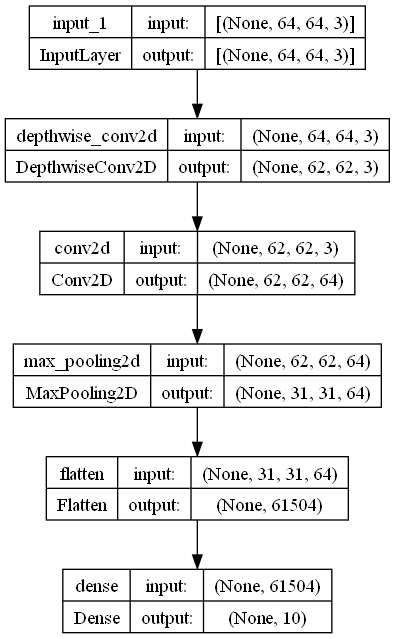

In [1]:
'''Ans 6:- Depthwise convolution is a component of separable
convolution used to reduce computation and parameters in Convolutional
Neural Networks (CNNs). It applies a single convolutional filter
to each input channel independently, producing multiple
feature maps. These depthwise feature maps are then combined using
pointwise convolution, which applies 1x1 filters to create the final
output. Depthwise convolution is efficient, especially on mobile
devices, as it reduces both computation and memory requirements
while maintaining model performance.

We create a simple CNN with a depthwise separable
convolutional layer using DepthwiseConv2D and a pointwise convolutional
layer using Conv2D from TensorFlow's Keras API. Depthwise
separable convolution applies spatial and depth-wise convolutions
independently, reducing computation while maintaining model performance.'''

import tensorflow as tf
from tensorflow.keras.layers import DepthwiseConv2D, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Create a simple model with depthwise separable convolution layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)), 
    DepthwiseConv2D(kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model (add loss function, optimizer, etc.)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Plot and display the model's architecture in the notebook
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
'''Ans 7:- Depthwise separable convolution is a lightweight
alternative to traditional convolutions in deep learning. It splits
the convolution operation into two steps: depthwise
convolution (applying a single filter per input channel) and pointwise
convolution (combining the results with 1x1 convolutions). This
reduces computational cost and parameters while preserving feature
learning, making it ideal for resource-constrained applications like
mobile devices.'''

In [ ]:
'''Ans 8:- Capsule networks, or CapsNets, are a type of neural
network architecture inspired by human brain structure. They aim
to overcome limitations of traditional convolutional neural
networks (CNNs) in understanding hierarchical relationships among
features. Capsules are groups of neurons that collectively represent
a specific feature or entity in an image. CapsNets use
dynamic routing to determine how capsules interact, enabling
better recognition of object parts and their spatial
arrangements. This can improve image understanding, particularly in
scenarios with occlusion or viewpoint changes. Capsule networks
offer promise for advanced computer vision tasks.'''

In [2]:
'''Ans 9:- Pooling is crucial in Convolutional Neural Networks (CNNs)
for several reasons. It helps reduce spatial dimensions,
downsampling feature maps, and decreasing computation. Pooling retains
essential information while discarding noise, promoting translation
invariance. It also enables the network to focus on important features
and improves its ability to generalize. Pooling reduces
overfitting by summarizing information and allows the network to learn
hierarchical representations efficiently. Overall, pooling enhances
CNNs' capacity to handle complex data, making them suitable for
various computer vision tasks like image classification and object
detection.

In this example, we create a simple CNN with a
MaxPooling2D layer using TensorFlow's Keras API. MaxPooling2D reduces
the spatial dimensions of feature maps by selecting the
maximum value within each pooling window (2x2 in this case),
effectively downscaling the feature maps. This helps in retaining
essential information while reducing computation.'''

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

# Create a simple CNN with MaxPooling2D
# Input shape (28x28 grayscale image)
input_layer = Input(shape=(28, 28, 1))  
conv_layer = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pooling_layer = MaxPooling2D(pool_size=(2, 2))(conv_layer)

# Create a model
model = Model(inputs=input_layer, outputs=pooling_layer)

# Generate random input data
input_data = tf.random.normal((32, 28, 28, 1))

# Perform a forward pass to demonstrate MaxPooling2D
output = model(input_data)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
'''Ans 10:- Receptive fields in neural networks refer to the region of
input data that a neuron or filter is sensitive to. In
convolutional neural networks (CNNs), each layer's receptive field is
determined by the size of its convolutional filters. As information
flows through the network, receptive fields increase, allowing
neurons to capture progressively larger patterns or features from
the input data, enabling hierarchical feature extraction.'''